#**IRIS FLOWER CLASSIFICATION**

---




##Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Import the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Analyze and Visulaize the data

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

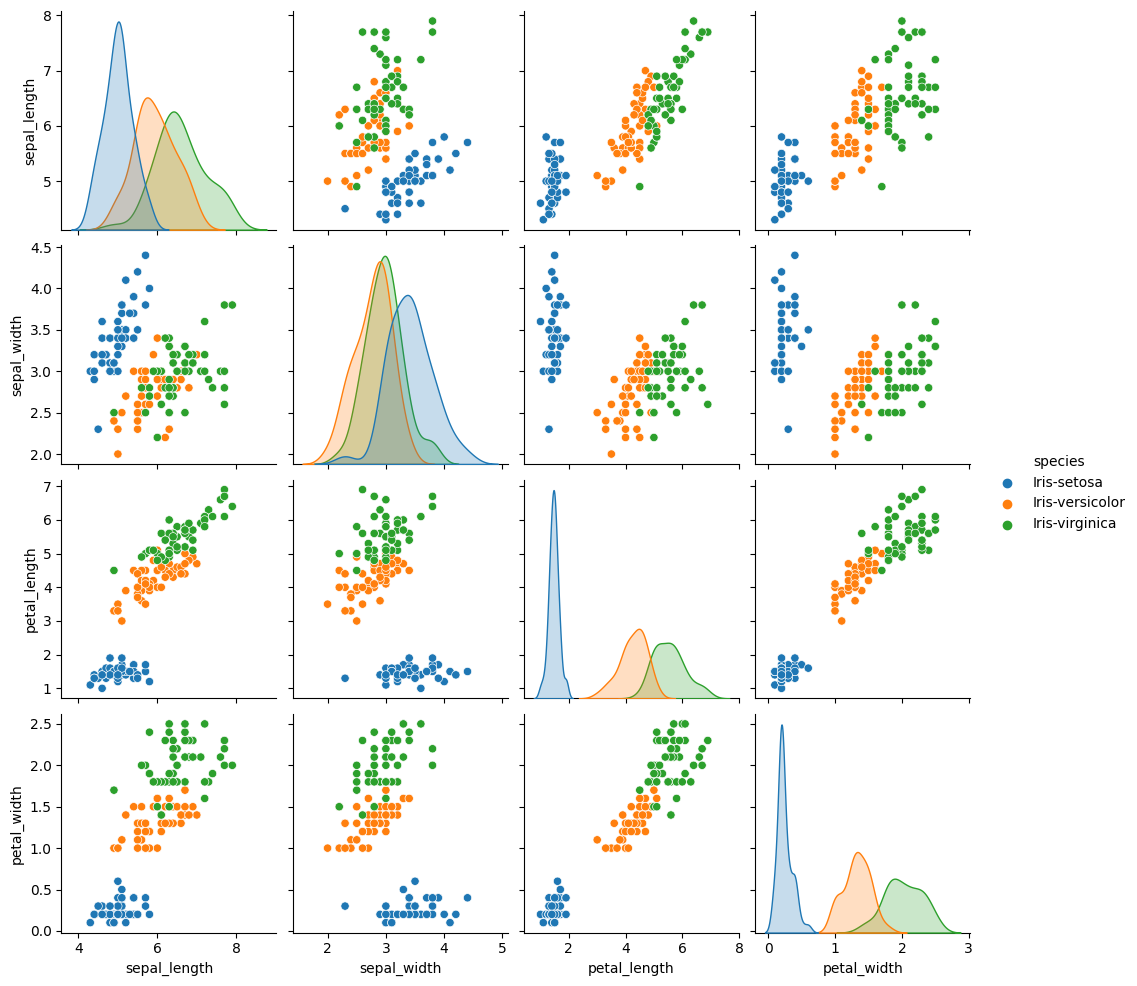

In [ ]:
sns.pairplot(df, hue='species')

In [ ]:
import plotly.express as px
Fig1 = px.histogram(df, x='species', color='sepal_length')
Fig1.show()

In [ ]:
Fig2 = px.histogram(df, x='species', color='sepal_width')
Fig2.show()

In [ ]:
Fig3 = px.histogram(df, x='species', color='petal_width')
Fig3.show()

In [ ]:
Fig4 = px.histogram(df, x='species', color='petal_length')
Fig4.show()

In [ ]:
def Scatterplot(X, Y, c=None):
    global df

    plt.figure(figsize=(15, 6))
    for species in df['species'].unique():
        plt.scatter(ds[X][ds['species'] == species], ds[Y][ds['species'] == species], label=species, edgecolor="k", alpha=0.7)
    plt.xticks(rotation=0)

    plt.title("Scatter plot X:{} / Y:{}".format(X, Y))
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.legend()
    plt.show()

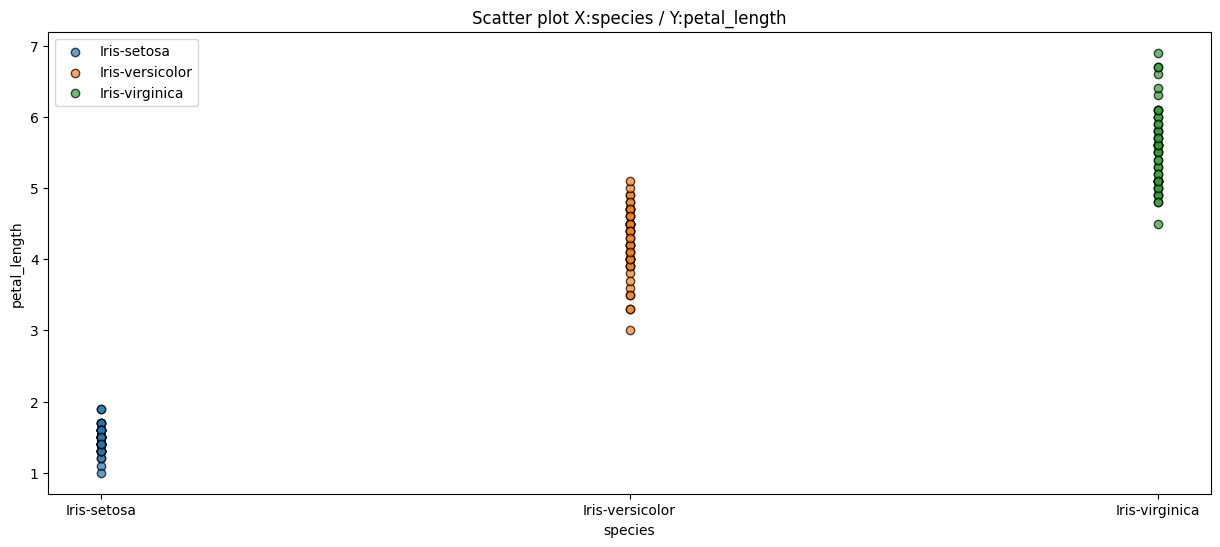

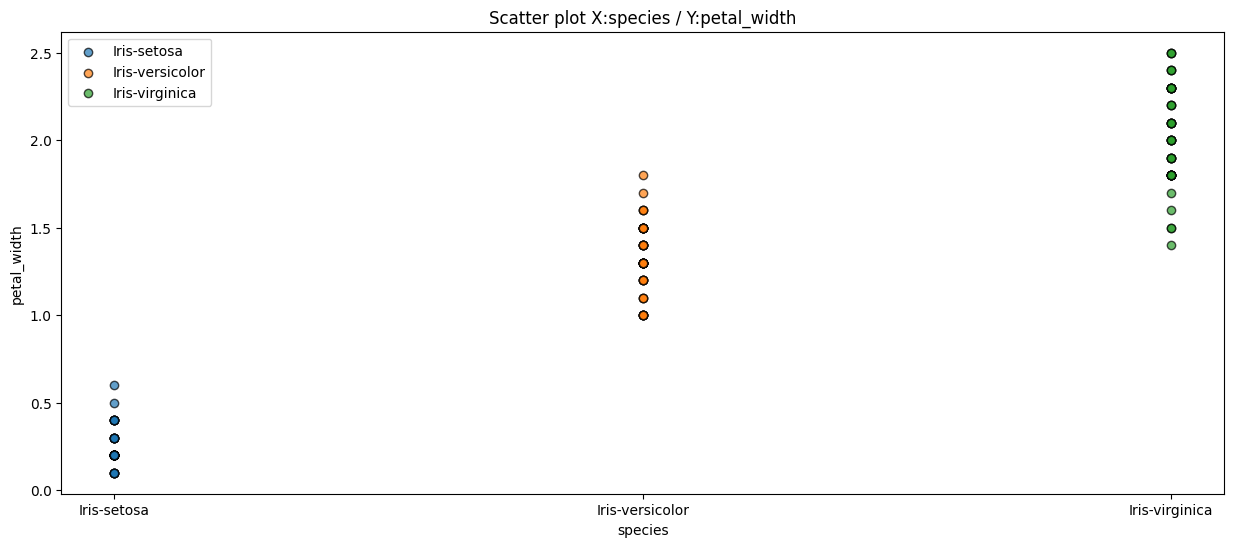

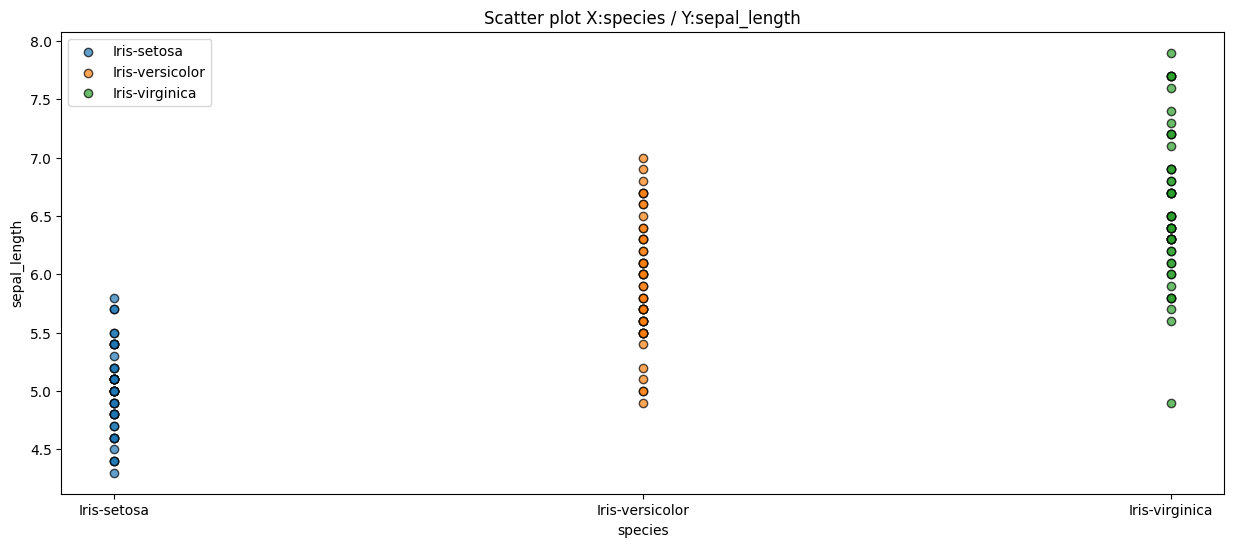

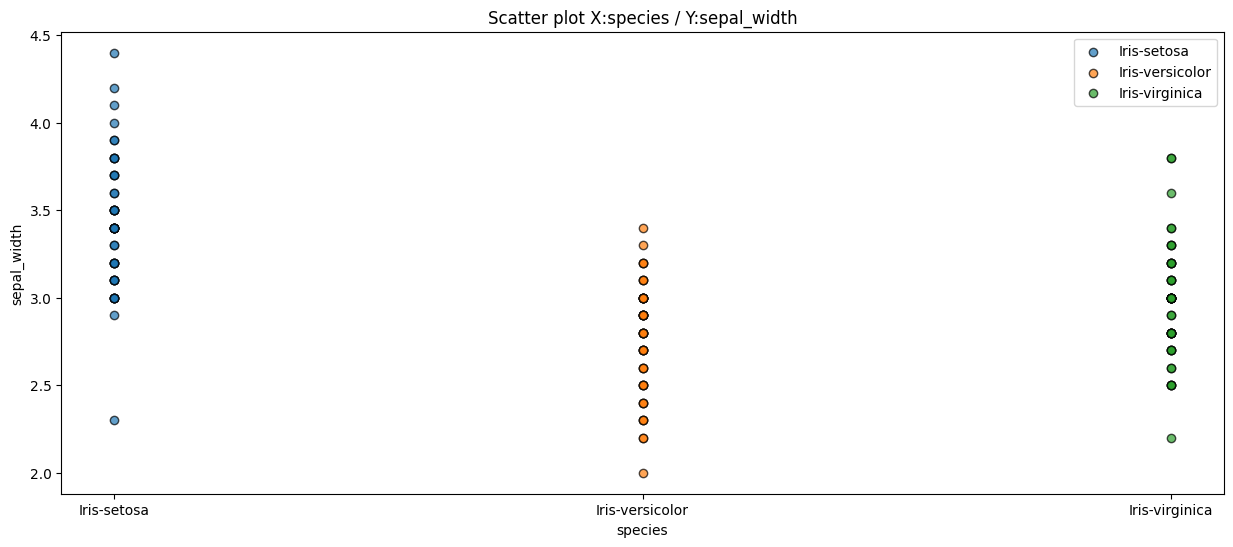

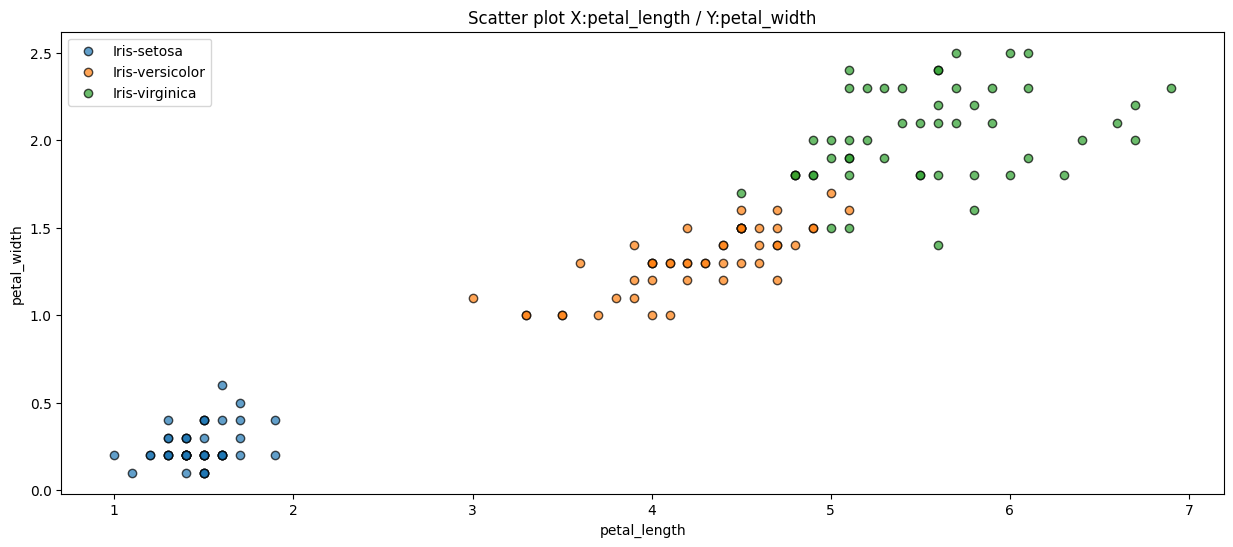

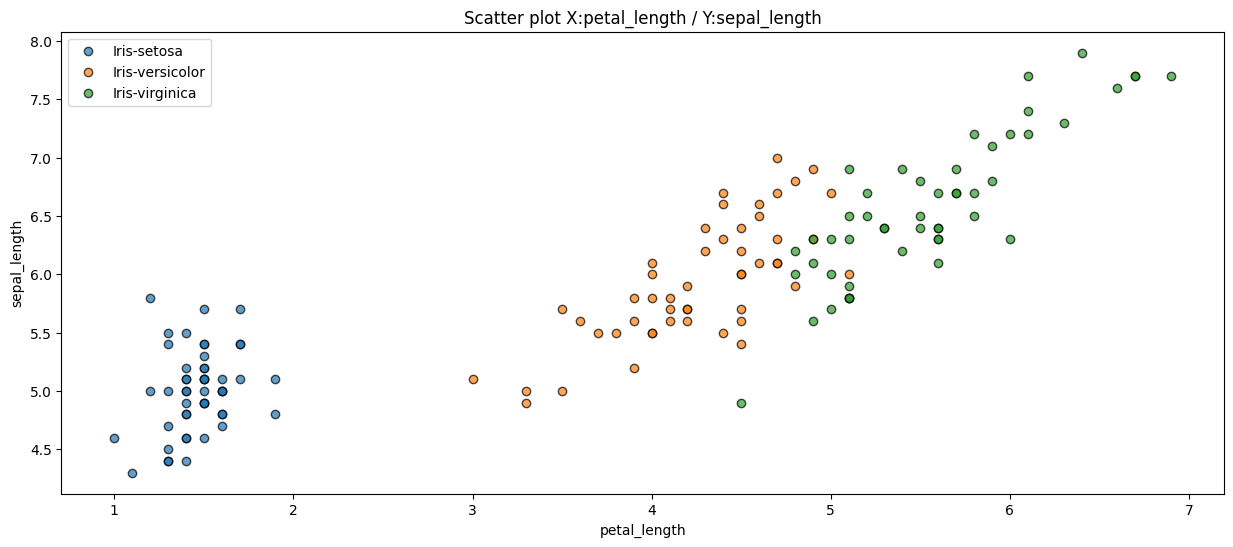

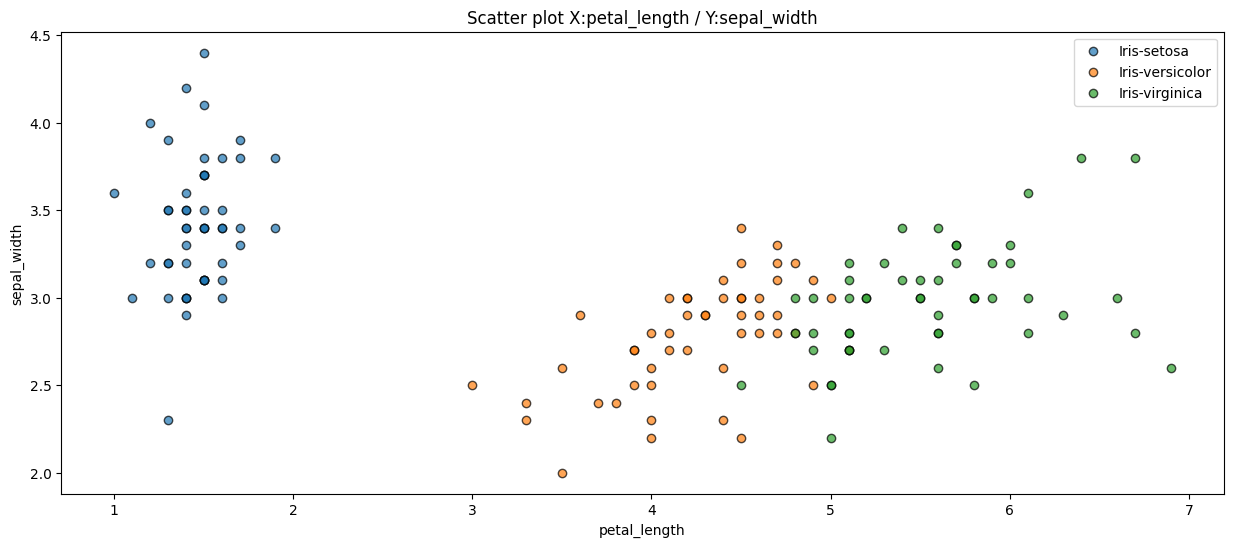

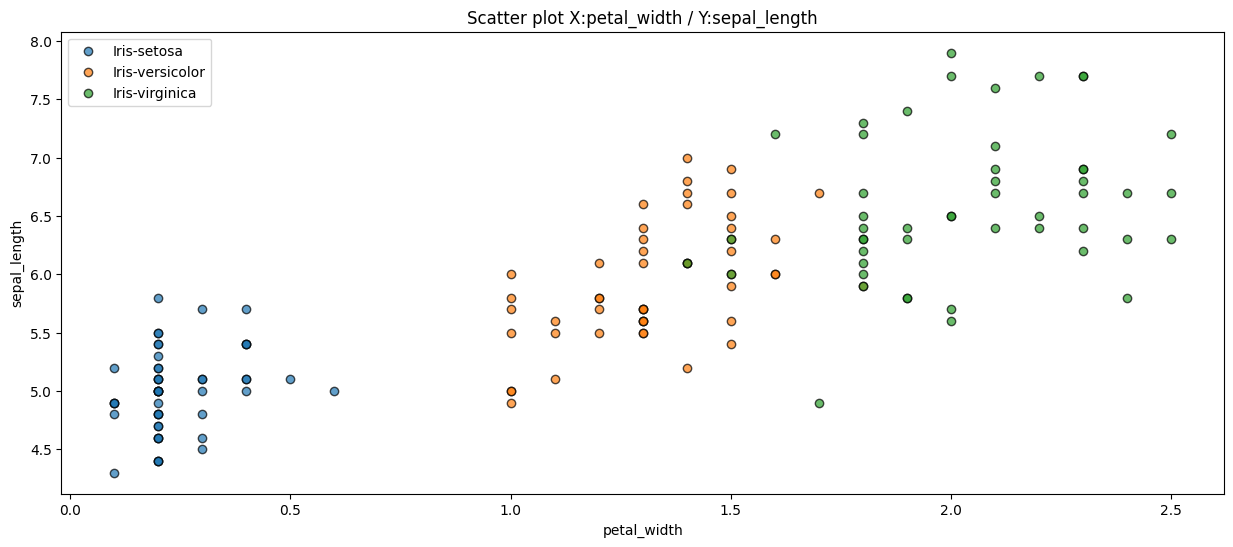

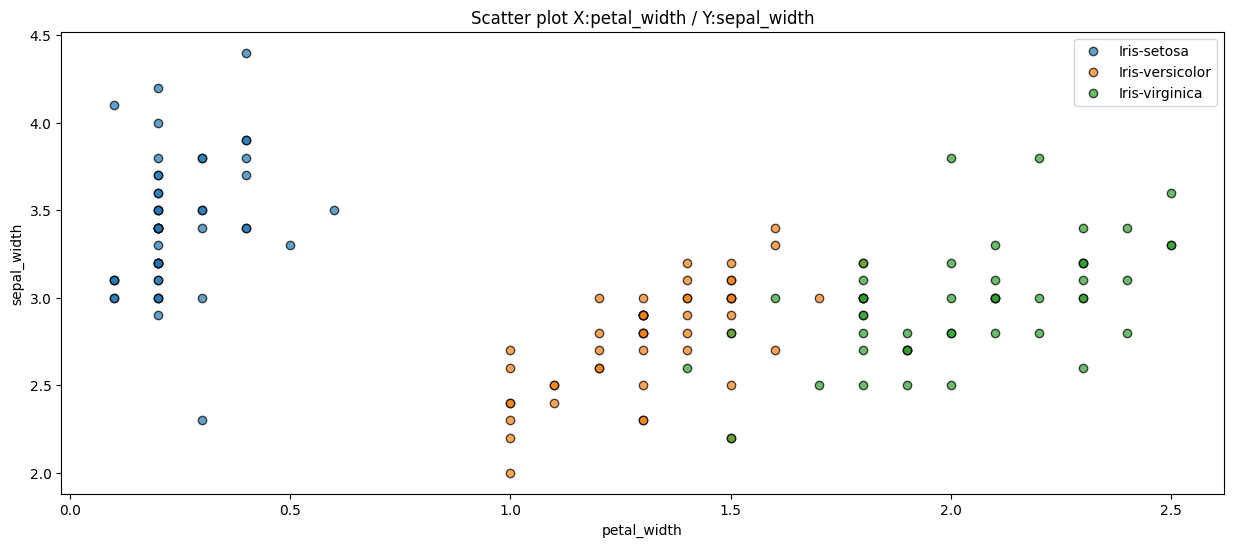

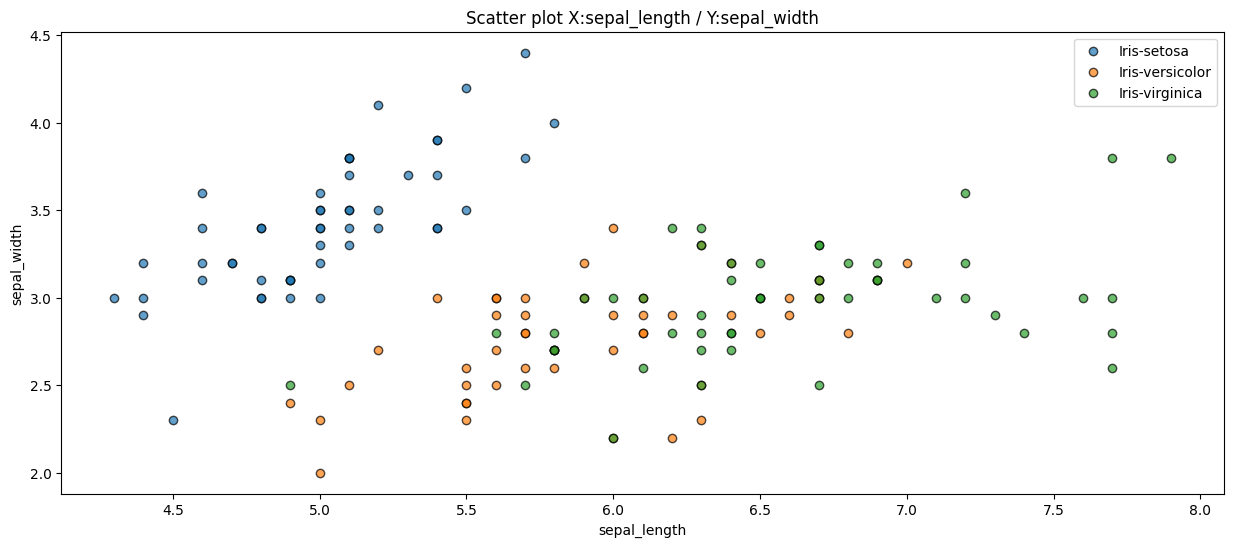

In [ ]:
from itertools import combinations
import matplotlib.pyplot as plt

def Scatterplot(X, Y):
    plt.figure(figsize=(15, 6))
    for species in df['species'].unique():
        plt.scatter(df[X][df['species'] == species], df[Y][df['species'] == species], label=species, edgecolor="k", alpha=0.7)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(X, Y))
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.legend()
    plt.show()

comb = combinations(["species", "petal_length", "petal_width", "sepal_length", "sepal_width"], 2)
comb_list = [list(i) for i in comb]

for col in comb_list:
    Scatterplot(col[0], col[1])

#Model training

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('species',axis=1)
y = df['species']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.28, random_state = 1 )

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(107, 4)
(43, 4)
(107,)
(43,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
MODEL1 = LogisticRegression()
MODEL1.fit(x_train, y_train)
ACC_LR = MODEL1.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", ACC_LR)

Accuracy (Logistic Regression):  97.67441860465115


k nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
MODEL2 = KNeighborsClassifier()
MODEL2.fit(x_train,y_train)
ACC_KNN = MODEL2.score(x_test, y_test)*100
print("Accuracy (KNN): ",ACC_KNN)

Accuracy (KNN):  97.67441860465115


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
MODEL3 = DecisionTreeClassifier()
MODEL3.fit(x_train,y_train)
ACC_DT = MODEL3.score(x_test,y_test)*100
print("Accuracy (Decision Tree): ",ACC_DT)

Accuracy (Decision Tree):  95.34883720930233


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
MODEL4 = RandomForestClassifier()
MODEL4.fit(x_train,y_train)
ACC_RF = MODEL4.score(x_test,y_test)*100
print("Accuracy (Random Forest Classifier): ",ACC_RF)

Accuracy (Random Forest Classifier):  95.34883720930233


Accuracy Data

<Axes: xlabel='Accuracy', ylabel='Models'>

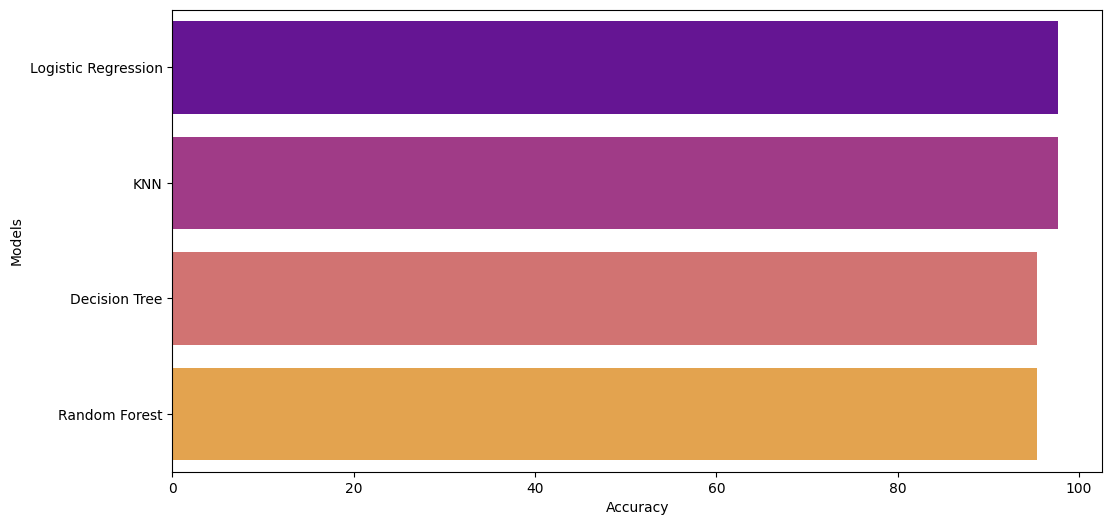

In [ ]:
plt.figure(figsize=(12,6))
MODEL_ACC = [ACC_LR,ACC_KNN,ACC_DT,ACC_RF]
MODEL_NAME = ['Logistic Regression','KNN','Decision Tree','Random Forest']
plt.xlabel("Accuracy")
plt.ylabel("Models")
sns.barplot(x=MODEL_ACC, y=MODEL_NAME, palette='plasma')

The Logistic Regression performed the best, achieving an accuracy of 97.67%

In [ ]:
MODEL1.fit(x_train,y_train)

LogisticRegression()